
# 🏠 House Rent Analysis using NumPy & Seaborn

## 🎯 Objective:
Perform Exploratory Data Analysis (EDA) to understand how various property features affect rental prices.

We'll use:
- **Pandas** for data handling
- **NumPy** for numerical operations
- **Seaborn** for visualizations
- **Five Why’s** technique for deep analysis


In [3]:

import pandas as pd

# Load dataset
df = pd.read_csv("house_rent_data.csv")

# Preview data
df.head()


,PropertyID,City,Size_sqft,Bedrooms,Bathrooms,Furnished,Rent
0,1,Chennai,1110.0,2,3,Yes,27422.0
1,2,Pune,NaN,2,2,Yes,NaN
2,3,Pune,860.0,2,3,Yes,22302.0
3,4,Mumbai,868.0,2,2,No,27008.0
4,5,Delhi,1554.0,3,4,No,48880.0


In [13]:

# Structure and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PropertyID  150 non-null    int64  
 1   City        150 non-null    object 
 2   Size_sqft   147 non-null    float64
 3   Bedrooms    150 non-null    int64  
 4   Bathrooms   150 non-null    int64  
 5   Furnished   150 non-null    object 
 6   Rent        147 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 8.3+ KB


In [15]:
# Summary stats
df.describe(include='all')

,PropertyID,City,Size_sqft,Bedrooms,Bathrooms,Furnished,Rent
count,150.000000,150,147.000000,150.000000,150.000000,150,147.000000
unique,NaN,5,NaN,NaN,NaN,2,NaN
top,NaN,Delhi,NaN,NaN,NaN,No,NaN
freq,NaN,36,NaN,NaN,NaN,88,NaN
mean,75.500000,NaN,953.333333,1.893333,2.266667,NaN,26048.496599
std,43.445368,NaN,281.593055,0.696556,0.879801,NaN,8611.370640
min,1.000000,NaN,400.000000,1.000000,1.000000,NaN,8765.000000
25%,38.250000,NaN,765.500000,1.000000,2.000000,NaN,20278.500000
50%,75.500000,NaN,954.000000,2.000000,2.000000,NaN,26030.000000
75%,112.750000,NaN,1159.500000,2.000000,3.000000,NaN,31449.500000


In [17]:
# Missing values
df.isnull().sum()

PropertyID    0
City          0
Size_sqft     3
Bedrooms      0
Bathrooms     0
Furnished     0
Rent          3
dtype: int64

In [11]:
# Drop missing values
df_clean = df.dropna()

In [9]:
# Preview cleaned data
df_clean.head()

,PropertyID,City,Size_sqft,Bedrooms,Bathrooms,Furnished,Rent
0,1,Chennai,1110.0,2,3,Yes,27422.0
2,3,Pune,860.0,2,3,Yes,22302.0
3,4,Mumbai,868.0,2,2,No,27008.0
4,5,Delhi,1554.0,3,4,No,48880.0
5,6,Delhi,1367.0,3,3,No,33534.0


In [19]:

import numpy as np

# Convert to NumPy
size = df_clean['Size_sqft'].to_numpy()
rent = df_clean['Rent'].to_numpy()

# Stats
print("Average Size:", np.mean(size))
print("Std Dev Size:", np.std(size))
print("Average Rent:", np.mean(rent))

# Correlation
corr = np.corrcoef(size, rent)[0, 1]
print("Correlation between Size and Rent:", corr)


Average Size: 957.8413793103448
Std Dev Size: 278.63989059820614
Average Rent: 26030.441379310345
Correlation between Size and Rent: 0.8795074797273886


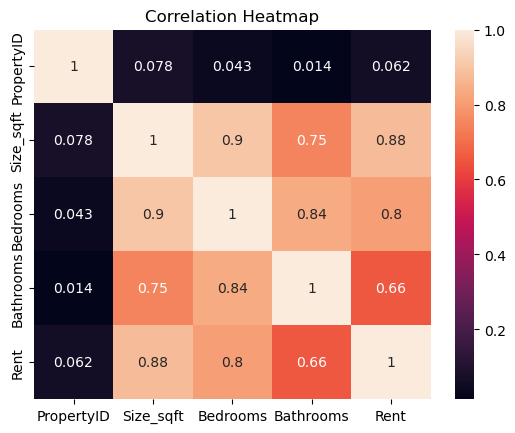

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

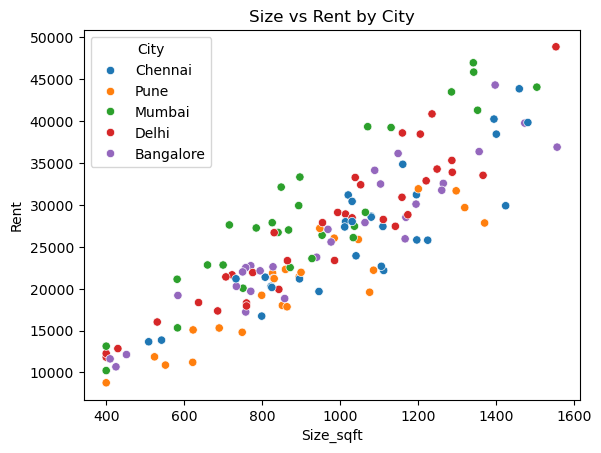

In [30]:
# Size vs Rent by City
sns.scatterplot(x='Size_sqft', y='Rent', data=df_clean, hue='City')
plt.title("Size vs Rent by City")
plt.show()

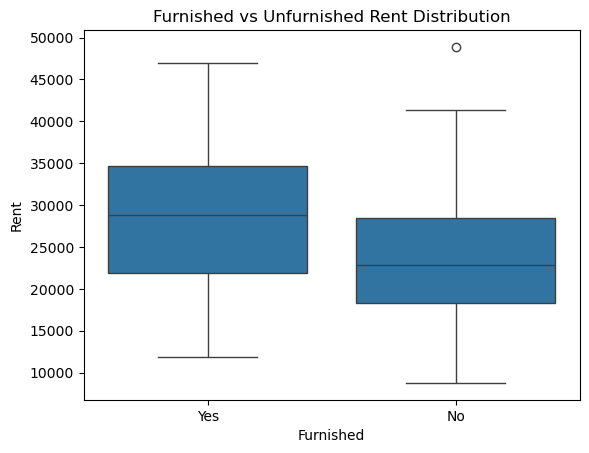

In [25]:
# Furnishing vs Rent
sns.boxplot(x='Furnished', y='Rent', data=df_clean)
plt.title("Furnished vs Unfurnished Rent Distribution")
plt.show()

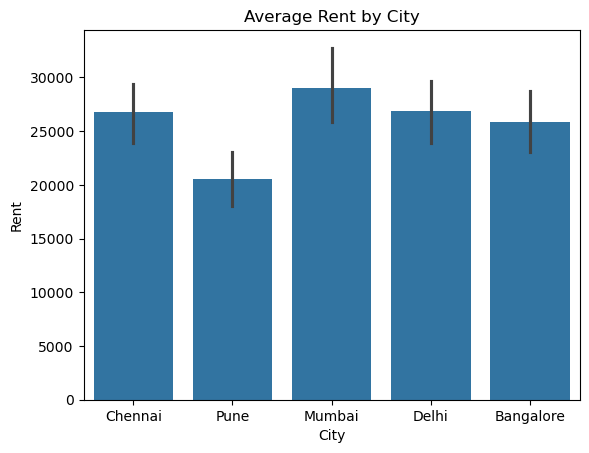

In [27]:
# Avg Rent by City
sns.barplot(x='City', y='Rent', data=df_clean, estimator=np.mean)
plt.title("Average Rent by City")
plt.show()

---

## ✅ Step 7: Five Why’s Root Cause Analysis

**Example Observation**: "Furnished homes have higher rent"

| Why # | Question | Answer |
|-------|----------|--------|
| 1     | Why do furnished homes have higher rent? | Because furniture adds value and convenience. |
| 2     | Why does convenience increase value? | Tenants save time and money furnishing the home. |
| 3     | Why is that important? | Many renters are short-term or relocating quickly. |
| 4     | Why do short-term renters prefer furnished? | They may be students or temporary workers. |
| 5     | Why do cities attract such renters? | Due to jobs, universities, and relocation. |

---
